#**THE SPARKS FOUNDATION**

#**Graduate Rotational Internship Program**

##***Data Science And Business Analytics Tasks***

###**Author: Akash Jain**


##**TASK 4 - Exploratory Data Analysis - Terrorism**

* Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.
* As a security/defense analyst, try to find out the hot zone of terrorism.
* What all security issues and insights you can derive by EDA?



#**Exploratory Data Analysis**
Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [1]:
# Importing all the important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#**Loading Dataset**


In [2]:
# Read the CSV file
df=pd.read_csv('/content/drive/MyDrive/dataset/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
# Sample Dataset
df.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Shape of Dataset
print('Shape:', df.shape)

Shape: (181691, 135)


In [5]:
# Dataset Columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# Removing the unknowns values from the columnns
df=df[pd.notnull(df.latitude)]
df=df[pd.notnull(df.longitude)]
print("Unknown values are removed from the columns")

Unknown values are removed from the columns


In [7]:
## Number of Duplicate Values in the dataset
df.duplicated().sum()

0

In [8]:
# Check Missing and Null Values
df.isnull().sum()


eventid            0
iyear              0
imonth             0
iday               0
approxdate    168026
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       152675
Length: 135, dtype: int64

In [9]:
df.fillna((0),inplace =True)


In [10]:
df.isnull().sum()


eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [11]:
# Dataset Sumamry
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177134 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 183.8+ MB


In [12]:
# Dataset Statistical Description
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.771340e+05,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,1.771340e+05,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.00000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,1.771340e+05,177134.000000,177134.000000,177134.000000,177134.000000,177134.00000,177134.000000,1.771340e+05,1.771340e+05,1.771340e+05,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.000000,177134.00000
mean,2.002979e+11,2002.913150,6.468668,15.517975,0.044644,132.362212,7.193402,23.498444,-4.586957e+02,1.360303,0.068970,0.988444,0.993101,0.878177,-0.516344,0.204359,0.138048,0.888073,0.037299,3.243211,0.131194,0.012533,8.420021,44.161019,126.626012,0.637478,3.302669,7.898980,0.065261,0.33841,0.922099,0.082203,0.002913,0.000350,0.003015,-40.628609,-0.951596,0.033297,0.751222,0.002614,0.024761,0.000734,0.005019,-0.168161,6.432684,9.937200,0.495800,0.688829,0.071691,0.110171,0.002365,0.003833,2.231215,0.029938,0.326984,2.912614,0.025630,0.067802,-0.566989,1.164536,4.535020e+04,0.057589,0.325505,-0.024648,-1.064441,-1.48312,-0.063466,2.354190e+04,1.811083e+03,3.121044e+03,0.747095,0.278315,-1.661940,-4.581616,-4.501502,0.090321,-3.98404
std,1.321102e+09,13.210935,3.388221,8.808546,0.206522,113.144515,2.912504,18.569247,2.047790e+05,0.827390,0.283677,0.106877,0.082772,0.327082,2.439842,0.550762,0.344951,0.315277,0.189495,1.906101,0.808407,0.278574,6.641836,31.900686,89.468247,2.854785,14.522760,43.590812,0.929141,4.78642,17.454630,0.274675,0.053894,0.018706,0.054823,173.674107,10.180949,0.874271,2.317133,0.103617,0.451453,0.027081,0.200186,1.228713,2.145223,7.045432,1.874243,3.260686,0.734973,1.398798,0.124009,0.250401,11.171577,4.620417,3.383628,34.724034,2.484684,1.187068,3.144790,1.600337,7.283569e+06,0.459092,55.144440,1.815296,14.113033,25.82244,0.796993,2.649383e+06,3.999189e+05,6.717704e+05,164.565872,1.209062,17.133527,4.542579,4.637493,0.562038,4.69604
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.00000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,0.000000,

In [13]:
# Unique values in each column
df.nunique()

eventid       177134
iyear             47
imonth            13
iday              32
approxdate      2211
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        13832
Length: 135, dtype: int64

#**Data Pre-processing**


In [14]:
# Renaming the columns                                                                                                                                                                      
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day',
                   'extended':'Extended', 'country_txt':'Country',
                   'provstate':'state', 'region_txt':'Region',
                   'attacktype1_txt':'AttackType', 'target1':'Target',
                   'nkill':'Killed', 'nwound':'Wounded', 'summary':'Summary',
                   'gname':'Group', 'targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type', 'motive':'Motive'}, inplace=True)

In [15]:
new_df = df[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude'
             ,'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [16]:
new_df.shape

(177134, 19)

In [17]:
new_df.columns

Index(['Year', 'Month', 'Extended', 'Day', 'Country', 'state', 'Region',
       'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

#**Correlation Analysis**

In [18]:
# Correlation Analysis
corr_mat = new_df.corr()
corr_mat

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
Year,1.000000,-0.001215,0.091673,0.017114,0.166930,0.003917,0.025358,0.017051
Month,-0.001215,1.000000,-0.000244,0.004008,-0.015971,-0.003880,0.003450,0.003135
Extended,0.091673,-0.000244,1.000000,-0.003361,-0.024750,0.000523,0.016383,-0.009926
Day,0.017114,0.004008,-0.003361,1.000000,0.003417,-0.002285,-0.003198,-0.001132
latitude,0.166930,-0.015971,-0.024750,0.003417,1.000000,0.001463,-0.013172,0.015920
longitude,0.003917,-0.003880,0.000523,-0.002285,0.001463,1.000000,-0.000587,0.000205
Killed,0.025358,0.003450,0.016383,-0.003198,-0.013172,-0.000587,1.000000,0.450002
Wounded,0.017051,0.003135,-0.009926,-0.001132,0.015920,0.000205,0.450002,1.000000


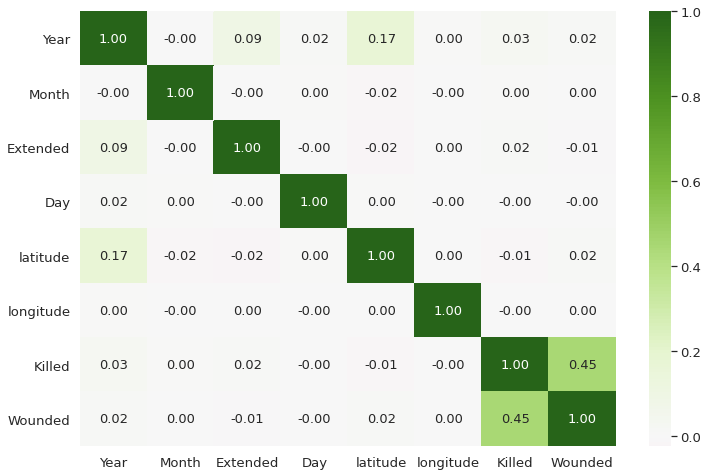

In [19]:
#create a heatmap to demonstrate the correlation magnitude among the variables
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap='PiYG', center=0)

#**Exploratory Data Analysis**

##**COUNTRIES AFFECTED BY TERRORIST ATTACKS**

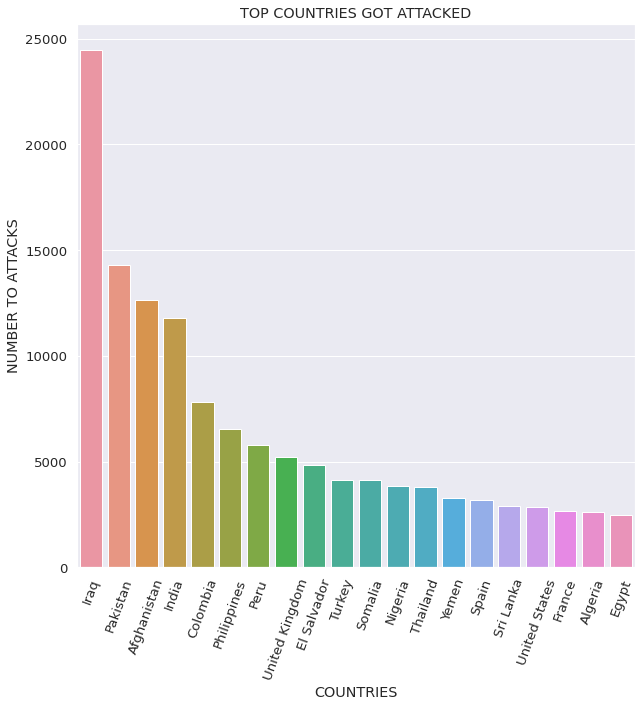

In [20]:
df['country'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=df['Country'].value_counts()[:20].index,y=df['Country'].value_counts()[:20].values)
plt.title('TOP COUNTRIES GOT ATTACKED')
plt.xticks(rotation=70)
plt.xlabel('COUNTRIES')
plt.ylabel('NUMBER TO ATTACKS')
plt.show()

## **REGION AFFECTED BY TERRORIST ATTACKS**

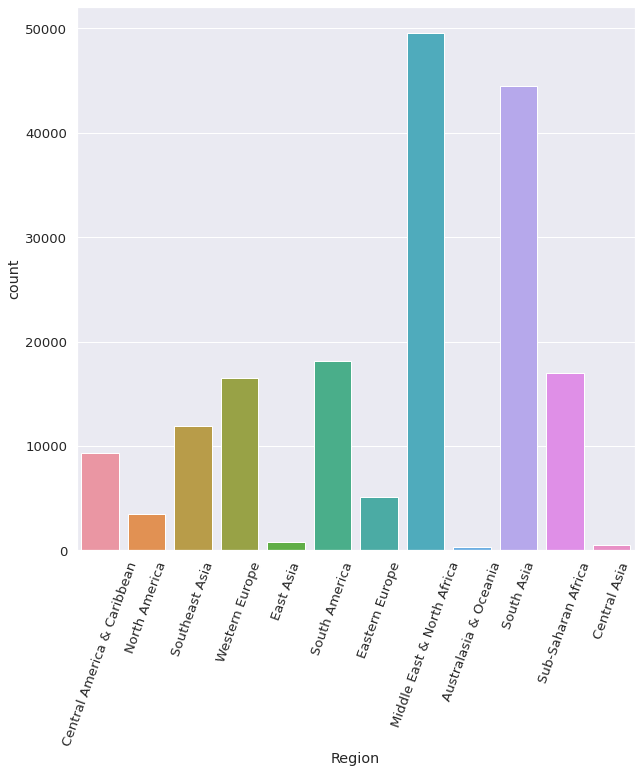

In [21]:
df['Region'].value_counts()
plt.figure(figsize=(10,10))
sns.countplot(x='Region',data=df)
plt.xticks(rotation=70)
plt.show()

## **NUMBER OF ATTACKS FROM 1970 TO 1986**

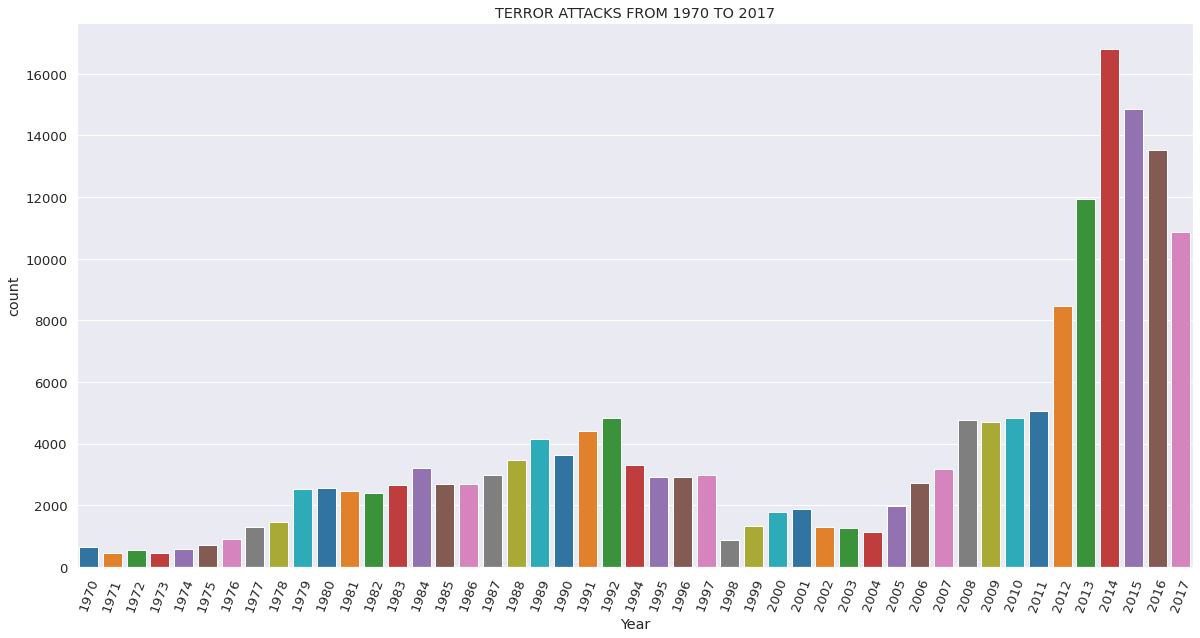

In [22]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Year',data=df,palette='tab10')
plt.xticks(rotation=70)
plt.title('TERROR ATTACKS FROM 1970 TO 2017')
plt.show()

## **TYPE OF ATTACK USED BY TERRORISTS**


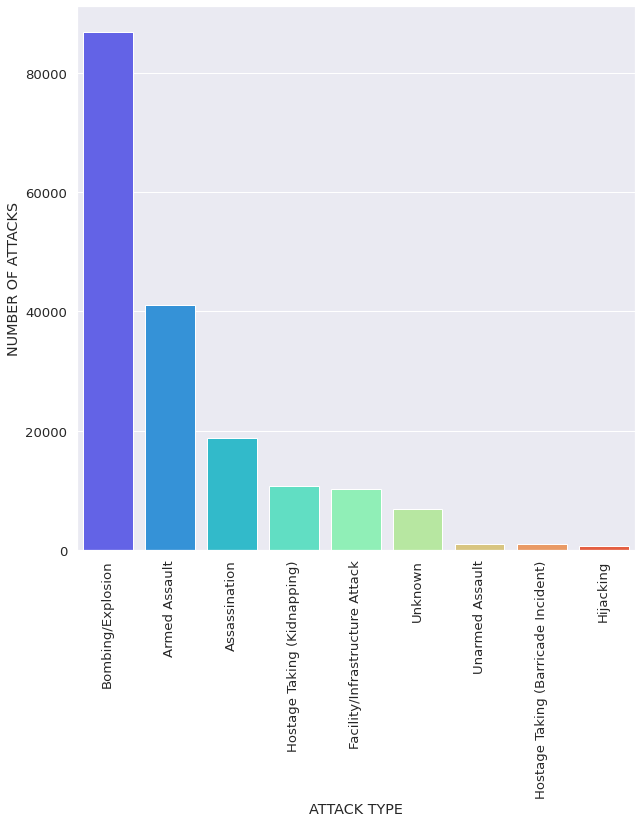

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['AttackType'],order=df['AttackType'].value_counts().index,palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('ATTACK TYPE')
plt.ylabel('NUMBER OF ATTACKS')
plt.show()

## **ATTACK TARGETS**

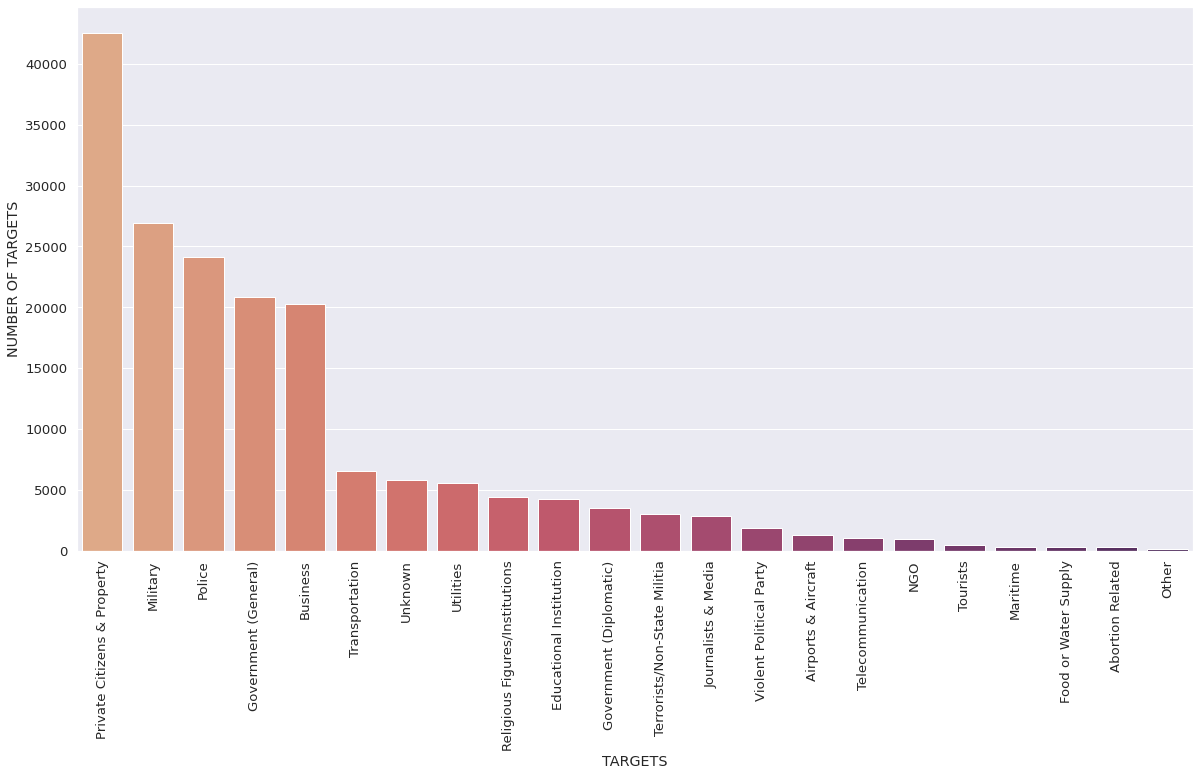

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Target_type'],order=df['Target_type'].value_counts().index,palette='flare')
plt.xticks(rotation=90)
plt.xlabel('TARGETS')
plt.ylabel('NUMBER OF TARGETS')
plt.show()


## **NAME OF GROUP ATTACKS TERRORIST**

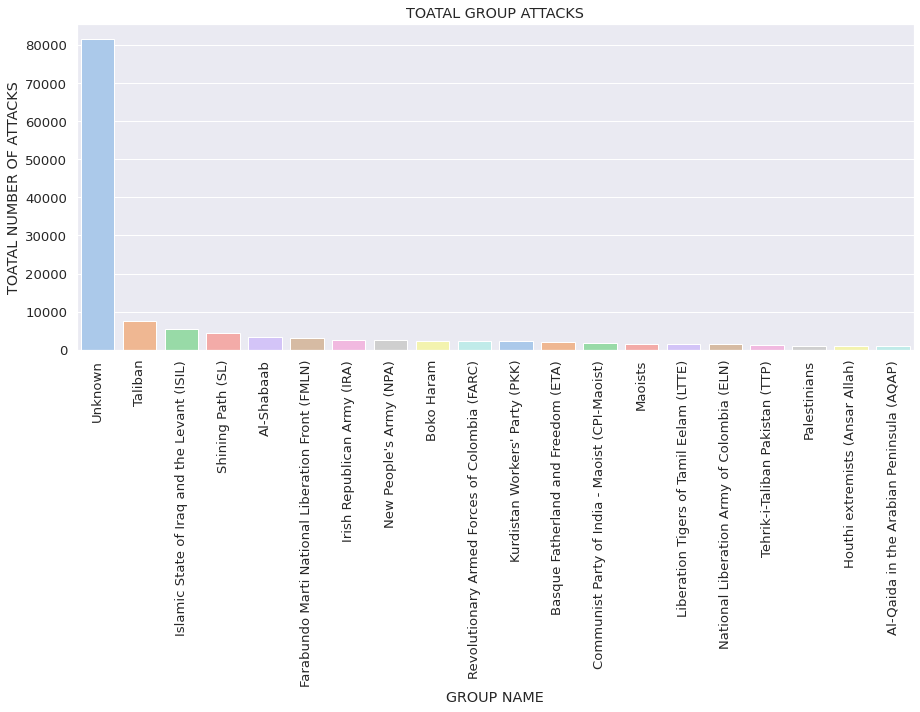

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Group'].value_counts()[:20].index,y=df['Group'].value_counts()[:20].values,palette='pastel')
plt.xticks(rotation=90)
plt.title('TOATAL GROUP ATTACKS')
plt.xlabel('GROUP NAME')
plt.ylabel('TOATAL NUMBER OF ATTACKS')
plt.show()

## **WEAPON USED FOR SUPPORTING THE ATTACK TYPE VISUAL**

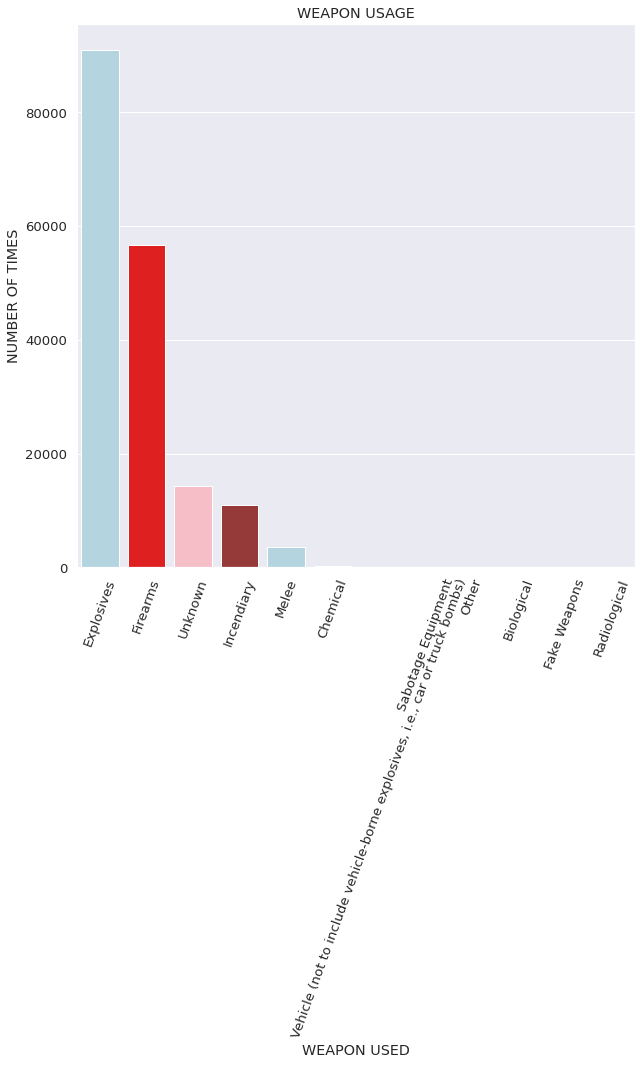

In [26]:

df['Weapon_type'].value_counts()
plt.figure(figsize=(10,10))
color=['lightblue','red','lightpink','brown']
sns.barplot(x=df['Weapon_type'].value_counts()[:20].index,y=df['Weapon_type'].value_counts()[:20].values , palette=color)
plt.title('WEAPON USAGE')
plt.xticks(rotation=70)
plt.xlabel('WEAPON USED')
plt.ylabel('NUMBER OF TIMES')
plt.show()

## **CITIES AFFECTED BY TERRORIST**

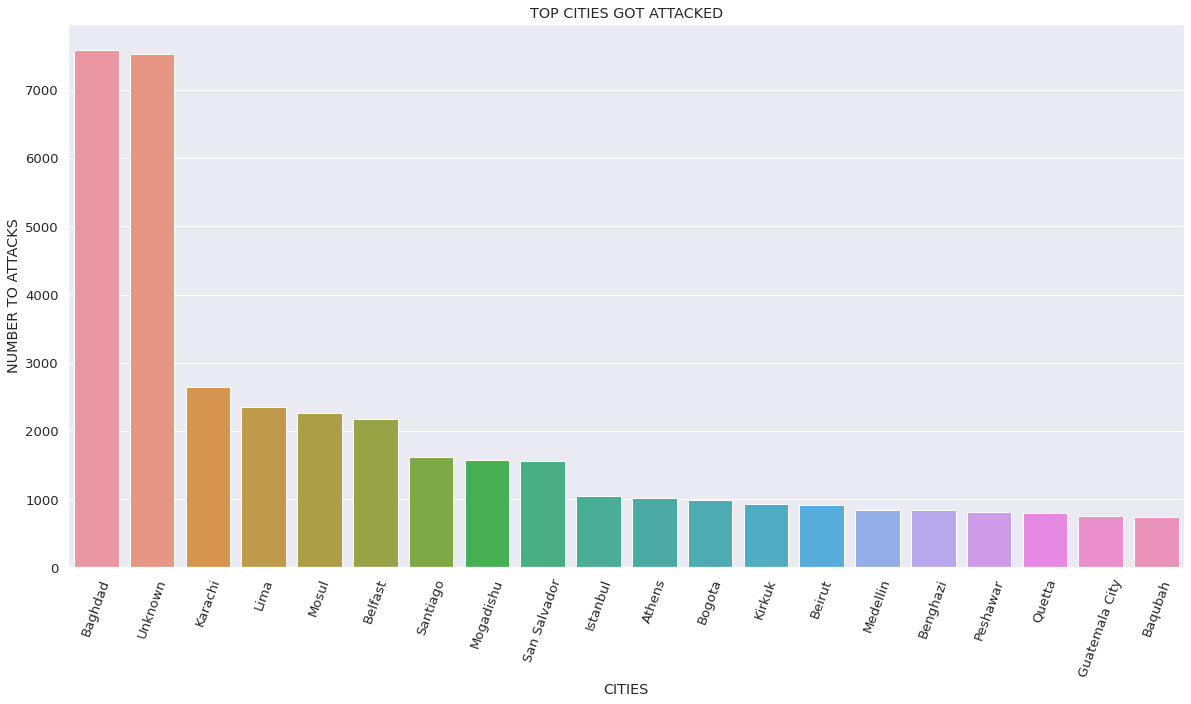

In [27]:

df['city'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=df['city'].value_counts()[:20].index,y=df['city'].value_counts()[:20].values)
plt.title('TOP CITIES GOT ATTACKED')
plt.xticks(rotation=70)
plt.xlabel('CITIES')
plt.ylabel('NUMBER TO ATTACKS')
plt.show()

#**Conclusion**

### ***-EI SALVADOR and UNITED KINGDOM are most attacked countries***
### ***- WESTERN EUROPE and CENTRAL AMERICA are most attacked region***
### ***- There was growth in terrorist attack form 1977 to 1981***
### **- BOMBING and EXPLOSIVE are most used weapon and attack type b=used by terrorist** *italicised text*
### ***- BUSINESS and PRIVATE CITIZEN & PROPERTY were most targeted during terrorist attack***
### ***- most number of attacks were done by unknown group or not an group terrorist***
### ***- BELLFAST and SAN SALVADOR are the most attacked cities***
# **THANK YOU!!!!**

